Q1. You are given a diabetes.csv data file that contains information about a person's age, gender, 
and whether they have diabetes or not. Your task is to implement Bayes' Theorem in Python to 
predict the probability of a person having diabetes based on their age and gender.

a) Load the dataset into a pandas dataframe and display the first 5 rows to get an idea of the 
data.

b) Calculate the prior probability of having diabetes and not having diabetes from the 
dataset.

c) Write a function to calculate the conditional probability of having diabetes given a 
person's age and gender.

d) Write a function to calculate the posterior probability of a person having diabetes based 
on their age and gender by using Bayes' Theorem.

e) Test your implementation by computing the posterior probability of a person having 
diabetes based on their age and gender for given test cases:

i. age = 30, gender = 'Female'

ii. age = 30, gender = 'Male'

iii. age = 50, gender = 'Male'

iv. age = 70, gender = 'Male'.

v. Age = 80, gender = 'Female'.


In [1]:
import pandas as pd

#part (a)
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Display the first 5 rows
print(df.head())

   age  gender  diabetes
0   52  Female         1
1   42  Female         0
2   63    Male         1
3   73    Male         1
4   50    Male         1


In [2]:
df

,age,gender,diabetes
0,52,Female,1
1,42,Female,0
2,63,Male,1
3,73,Male,1
4,50,Male,1
...,...,...,...
9995,58,Male,1
9996,32,Male,0
9997,34,Male,0
9998,75,Male,0


In [10]:
#part(b)
# Calculate the prior probability of having diabetes and not having diabetes
p_diabetes = df['diabetes'].mean()
p_not_diabetes = 1 - p_diabetes
p_diabetes

0.553

In [15]:
#part (c)
# Calculate the conditional probability of having diabetes given age and gender
def conditional_prob(age, gender):
    df_filtered = df[(df['age'] == age) & (df['gender'] == gender)]
    p_diabetes_given_age_gender = df_filtered['diabetes'].mean()
    return p_diabetes_given_age_gender
conditional_prob(52,'Male')

0.5675675675675675

In [16]:
#part (d)
# Use Bayes' Theorem to calculate the posterior probability of having diabetes
def bayes_prob(age, gender):
    p_age_gender = df[(df['age'] == age) & (df['gender'] == gender)].count()[0] / len(df)
    p_diabetes_given_age_gender = conditional_prob(age, gender)
    return (p_diabetes_given_age_gender * p_age_gender) / p_diabetes

In [27]:
bayes_prob(52,'Female')

0.00867992766726944

In [28]:
#part (e)
# Test the implementation
test_cases = [(30, 'Female'), (30, 'Male'), (50, 'Male'), (70, 'Male'), (80, 'Female')]
for age, gender in test_cases:
    print(f"The probability of a {age}-year-old {gender} having diabetes is: {bayes_prob(age, gender):.4f}")


The probability of a 30-year-old Female having diabetes is: 0.0067
The probability of a 30-year-old Male having diabetes is: 0.0058
The probability of a 50-year-old Male having diabetes is: 0.0076
The probability of a 70-year-old Male having diabetes is: 0.0103
The probability of a 80-year-old Female having diabetes is: 0.0141


Q2. A company produces chocolate bars with a target weight of 50 grams. However, due to 
manufacturing variations, the actual weight of the chocolate bars can deviate from the target. The 
company wants to study the distribution of the weight of its chocolate bars to ensure that the 
majority of the bars fall within an acceptable range.
Using Python, perform the following tasks:

a) Assume that the chocolate weight follows a normal distribution with a mean of 50 
grams and a standard deviation of 2 grams. Generate a sample of 1000 random 
numbers that represent the weight of the chocolate bars.

b) Plot a histogram of the sample to visualize the distribution of the weights.

c) Calculate the mean and standard deviation of the sample.

d) Calculate the percentage of chocolate bars that weight between one, two and three 
standard deviations from the target weight.

e) From generated samples calculate the probability that a chocolate bar weighs less 
than 45 grams or greater than 55 grams.


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the normal distribution
mu = 50
sigma = 2

#part (a)
# Generate a sample of 1000 random numbers from a normal distribution
sample = np.random.normal(mu, sigma, size=1000)

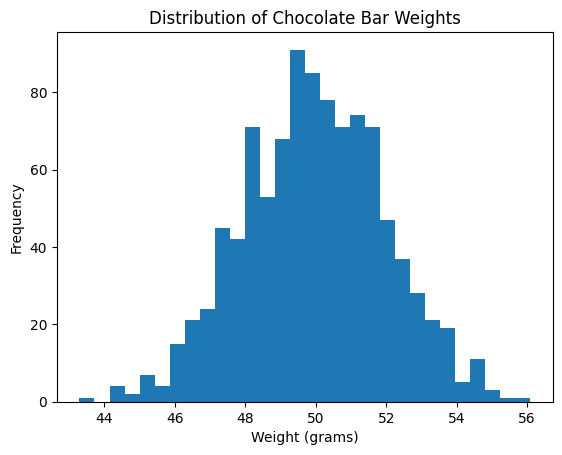

In [33]:
#part (b)
# Plot a histogram of the sample
plt.hist(sample, bins=30)
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Chocolate Bar Weights')
plt.show()


In [34]:
#part (c)
# Calculate the mean and standard deviation of the sample
sample_mean = np.mean(sample)
sample_std = np.std(sample)

print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)

Sample mean: 49.95527313596934
Sample standard deviation: 2.007656129312156


In [40]:
# Calculate the percentage of chocolate bars that weight between one standard deviation
within_one_std = np.sum((sample > mu-sigma) & (sample < mu+sigma)) / len(sample) * 100
print("Percentage within one standard deviation:", within_one_std)

Percentage within one standard deviation: 68.10000000000001


In [36]:
# Calculate the percentage of chocolate bars that weight between two standard deviation
within_two_std = np.sum((sample > mu-2*sigma) & (sample < mu+2*sigma)) / len(sample) * 100
print("Percentage within two standard deviation:", within_two_std)

Percentage within two standard deviation: 95.6


In [37]:
# Calculate the percentage of chocolate bars that weight between three standard deviation
within_three_std = np.sum((sample > mu-3*sigma) & (sample < mu+3*sigma)) / len(sample) * 100
print("Percentage within three standard deviation:", within_three_std)

Percentage within three standard deviation: 99.8


In [38]:
#part (e)
# Calculate the probability that a chocolate bar weighs less than 45 grams or greater than 55 grams
less_than_45_greater_than_55 = np.sum((sample < 45) | (sample > 55) ) / len(sample)
print("Probability of a chocolate bar weighing less than 45 grams or greater than 55 grams:", less_than_45_greater_than_55)


Probability of a chocolate bar weighing less than 45 grams or greater than 55 grams: 0.01


Q3. A factory produces widgets whose weight follows a uniform distribution between 0.5 to 1.5 
grams. The factory manager wants to know if the average weight of a batch of 1000 widgets is 
close to the expected weight of 1 gram, and if the distribution of the sample means follows the 
central limit theorem.
Write a Python program that:

a) Generates 10000 batches of 1000 widgets each and computes the mean of each batch.

b) Plots a histogram of the sample means.
c) Computes the sample mean and standard deviation of the sample means and compares 
them to the expected sample mean and standard deviation values under the uniform 
distribution respectively.

d) Plot the histogram of sample means and a normal distribution’s pdf whose mean and 
standard deviation equal to expected sample mean and standard deviation values under 
the uniform distribution calculated in part (c).
From the figure can we say that the sample 
means follows a normal distribution with mean and standard deviation equal to expected 
sample mean and expected sample deviation computed in part (c).

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the uniform distribution
a = 0.5  # lower bound
b = 1.5  # upper bound
mu = (a + b) / 2  # expected value
sigma = np.sqrt((b - a)**2 / 12)  # standard deviation

In [42]:
#Part(a)
# Generate 1000 batches of 1000 widgets each, and compute the mean weight of each batch
batch_size = 100
num_batches = 10000
batch_means = np.zeros(num_batches)
for i in range(num_batches):
    batch = np.random.uniform(a, b, size=batch_size)
    batch_mean = np.mean(batch)
    batch_means[i] = batch_mean

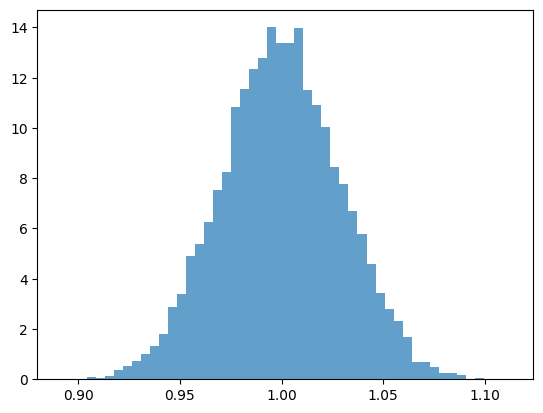

In [43]:
# Part (b)
# Plot a histogram of the sample means, and overlay the normal distribution with the same mean and variance
plt.figure()
plt.hist(batch_means, bins=50, density=True, alpha=0.7, label='Sample Means')
plt.show()

In [44]:
# Part (c)
# Compute the sample mean and standard deviation of the sample means
sample_mean = np.mean(batch_means)
sample_std = np.std(batch_means)  

In [45]:
# Compute the expected values under the uniform distribution and the central limit theorem
expected_uniform_mean = mu
expected_uniform_std = sigma / np.sqrt(batch_size)

In [46]:
# Print the results
print(f'Sample Mean: {sample_mean:.3f}, Expected Uniform Mean: {expected_uniform_mean:.3f}')
print(f'Sample Std: {sample_std:.3f}, Expected Uniform Std: {expected_uniform_std:.3f}')


Sample Mean: 1.000, Expected Uniform Mean: 1.000
Sample Std: 0.029, Expected Uniform Std: 0.029


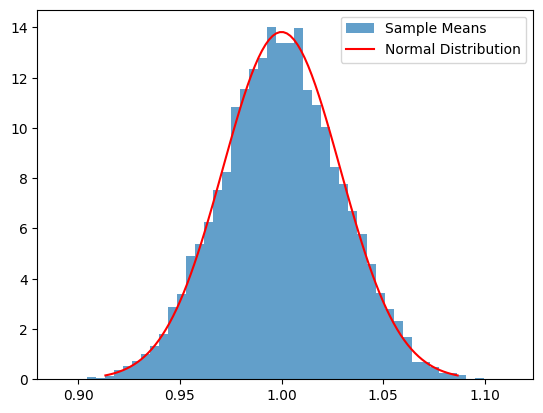

In [47]:
#Part(d)
plt.figure()
plt.hist(batch_means, bins=50, density=True, alpha=0.7, label='Sample Means')
x = np.linspace(mu - 3*expected_uniform_std, mu + 3*expected_uniform_std, 100)
y = 1/(expected_uniform_std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * expected_uniform_std**2))
plt.plot(x, y, 'r-', label='Normal Distribution')
plt.legend()
plt.show()

In [48]:
expected_normal_mean = mu
expected_normal_std = sigma / np.sqrt(batch_size)
print(f'Expected Normal Mean: {expected_normal_mean:.3f}')
print(f'Expected Normal Std: {expected_normal_std:.3f}')

Expected Normal Mean: 1.000
Expected Normal Std: 0.029
